In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [6]:
# Load your dataset
df = pd.read_csv("..\\DataSet\\Churn_Prdiction_Data\\churn-bigml-80.csv")

In [8]:
# Step 2: Encode categorical columns
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({True: 1, False: 0})  # if your 'Churn' is boolean

In [10]:
# Drop non-numeric columns that don't help much (like State)
df = df.drop(['State'], axis=1)

In [12]:
# Step 3: Feature & target split
X = df.drop('Churn', axis=1)
y = df['Churn']

In [14]:
# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Step 6: Train SVM model with probability enabled
model = SVC(probability=True, kernel='rbf' , C=1.0, gamma='scale')
model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [36]:
# Step 7: Predict probabilities for ROC
# y_probs = model.predict_proba(X_test_scaled)[:, 1]

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


NameError: name 'accuracy_score' is not defined

In [30]:
# Step 8: Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

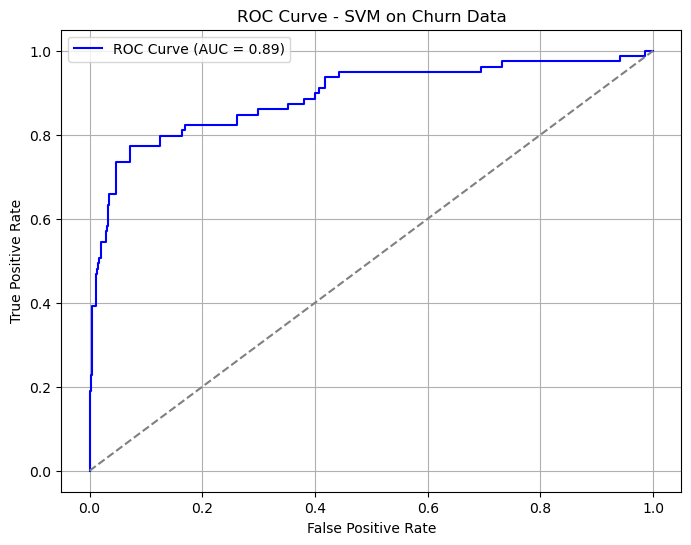

In [32]:
# Step 9: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM on Churn Data')
plt.legend()
plt.grid(True)
plt.show()